## Ironhack DAPT Jan 2024 - Mid-project


#### Historical] Restaurant Inspection Scores (2016-2019)


### Group' Hungre'



#### Authors: Shakt



#### Dataset:Restaurant Inspection Scoress https://data.sfgov.org/Health-and-Social-Services/-Historical-Restaurant-Inspection-Scores-2016-2019/pyih-qa8i/about_data?row_index=0s)


In [ ]:
# Import all dependencies 

import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns#
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset 
df = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df

In [ ]:
#Rename the column if columns name are not properly written
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

* ## Basic understanding of the dataset

* #### Nans, features, data types, basic stats, head.
* #### Check for more

In [ ]:
# Check for more
df.head()

In [ ]:
# Check the features
df.info()

There are lots of null value, missing data

In [ ]:
# Check the features 
df.columns

In [ ]:
# Check the data types 
df.dtypes

In [ ]:
# Check basic stats
df.describe()

In [ ]:
# Check for nans 
df.isna().sum()

In [ ]:
#calculates the percentage of missing values,
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [11]:
#Dropping all naans 
df.dropna(subset=['business_name','business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'neighborhoods', 'sf_find_neighborhoods',
       'current_police_districts', 'current_supervisor_districts',
       'analysis_neighborhoods'], inplace=True) 

I studied the Data very well, I figured out that I Could separate this Data Solution into two parts.
* inspection_score  and * Business
where
*Inspection Score will be my Target Column and bhalu.Beside that, I will inspect all Risk 
and violation under that risk Category.

    So in the end, I will look for the Inspection score, Risk, and violation of Inspection.


In [12]:
# For Inspection score what i don't need I am Dropping all these vcolumn
df.drop(["business_name"], axis=1 , inplace=True)
df.drop(["business_address"], axis=1 , inplace=True)
df.drop(["business_postal_code"], axis=1 , inplace=True)
df.drop(["business_latitude"], axis=1 , inplace=True)
df.drop(["business_longitude"], axis=1 , inplace=True)
df.drop(["business_location"], axis=1 , inplace=True)
df.drop(["business_phone_number"], axis=1 , inplace=True)
df.drop(["inspection_id"], axis=1 , inplace=True)
df.drop(["violation_id"], axis=1 , inplace=True)
df.drop(["neighborhoods"], axis=1 , inplace=True)
df.drop(["sf_find_neighborhoods"], axis=1 , inplace=True)
df.drop(["current_police_districts"], axis=1 , inplace=True) 
df.drop(["current_supervisor_districts"], axis=1 , inplace=True)
df.drop(["analysis_neighborhoods"], axis=1 , inplace=True)

In [13]:
#After dropping Looking the Data
df.head()

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category
110,3649,San Francisco,CA,12/06/2017 12:00:00 AM,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk
119,184,San Francisco,CA,02/13/2018 12:00:00 AM,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk
122,1154,San Francisco,CA,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk
123,1636,San Francisco,CA,10/03/2018 12:00:00 AM,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk
173,7764,San Francisco,CA,07/18/2018 12:00:00 AM,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk


* ## Data Featuring,
I am giving a new column with categories for the risk_category column, which
will explain the cause of risk_category according to the new column.
* #### Column name -(public_health_effect) featuring three effect of the risk_category to the publick health
* High Risk-food borne illnesses
* Moderate Risk-Diggyness
* Low Risk- no immediate risk

In [14]:
# Convert 'risk_category' column to numeric (assuming it contains strings like 'Moderate Risk', 'Low Risk', etc.)
df["public_health_effect"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "food borne illnesses"
    elif risk_category in ['Moderate Risk']:
        return "Diggyness"
    else:
        return "no immediate risk"

df["public_health_effect"] = df["risk_category"].apply(lambda x : advisor (x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect
110,3649,San Francisco,CA,12/06/2017 12:00:00 AM,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness
119,184,San Francisco,CA,02/13/2018 12:00:00 AM,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness
122,1154,San Francisco,CA,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness
123,1636,San Francisco,CA,10/03/2018 12:00:00 AM,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk
173,7764,San Francisco,CA,07/18/2018 12:00:00 AM,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk
...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,09/14/2017 12:00:00 AM,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk
38042,68442,San Francisco,CA,02/21/2019 12:00:00 AM,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk
38045,67330,San Francisco,CA,02/08/2018 12:00:00 AM,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk
38099,69769,San Francisco,CA,06/13/2017 12:00:00 AM,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness


In [15]:
#Value count for risk_category
df["risk_category"].value_counts()

risk_category
Low Risk         2467
Moderate Risk    1877
High Risk         722
Name: count, dtype: int64

In [16]:
#Should be same result
df["public_health_effect"].value_counts()

public_health_effect
no immediate risk       2467
Diggyness               1877
food borne illnesses     722
Name: count, dtype: int64

In [17]:
#
df.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_date',
       'inspection_score', 'inspection_type', 'violation_description',
       'risk_category', 'public_health_effect'],
      dtype='object')

* ## Now Starting Inspection score target,
* I am  going to take only 4 columns for the Inspection_score

In [18]:
#Inspection Score column
column_i = 'business_id','inspection_date','inspection_score','inspection_type'

In [19]:
#creates a new DataFrame inspection_data containing selected columns 
#('business_id', 'inspection_date', 'inspection_score', and 'inspection_type')
#from the sorted DataFrame, and finally displays this new DataFrame
df_sorted = df.sort_values(by='inspection_score', ascending=False)


inspection_data = pd.DataFrame({
    'Business ID': df_sorted['business_id'],
    'Inspection Date': df_sorted['inspection_date'],
    'Inspection Score': df_sorted['inspection_score'],
    'Inspection Type': df_sorted['inspection_type']
})

display(inspection_data)


,Business ID,Inspection Date,Inspection Score,Inspection Type
7575,5908,02/14/2018 12:00:00 AM,98.0,Routine - Unscheduled
13971,1147,05/23/2017 12:00:00 AM,98.0,Routine - Unscheduled
8525,9155,03/28/2018 12:00:00 AM,98.0,Routine - Unscheduled
13952,6007,12/05/2017 12:00:00 AM,98.0,Routine - Unscheduled
13942,5820,02/15/2017 12:00:00 AM,98.0,Routine - Unscheduled
...,...,...,...,...
17154,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled
16917,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled
503,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled
13716,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled


* Grouping the score-
* (45.948, 51.2]
* (51.2, 56.4]
* (56.4, 61.6]
* (61.6, 66.8]
* (66.8, 72.0]
* (72.0, 77.2]
* (77.2, 82.4]
* (82.4, 87.6]
* (87.6, 92.8]
* (92.8, 98.0)       934

In [20]:
#so defining the inspection score
df_inspection_score= df.sort_values(by='inspection_score', ascending=False)
grouped_by_score = df_inspection_score.groupby(pd.cut(df_sorted['inspection_score'], bins=10))
grouped_by_score_counts = grouped_by_score.size()
print(grouped_by_score_counts)


inspection_score
(45.948, 51.2]      24
(51.2, 56.4]         0
(56.4, 61.6]        27
(61.6, 66.8]        95
(66.8, 72.0]       301
(72.0, 77.2]       399
(77.2, 82.4]       672
(82.4, 87.6]      1102
(87.6, 92.8]      1512
(92.8, 98.0]       934
dtype: int64


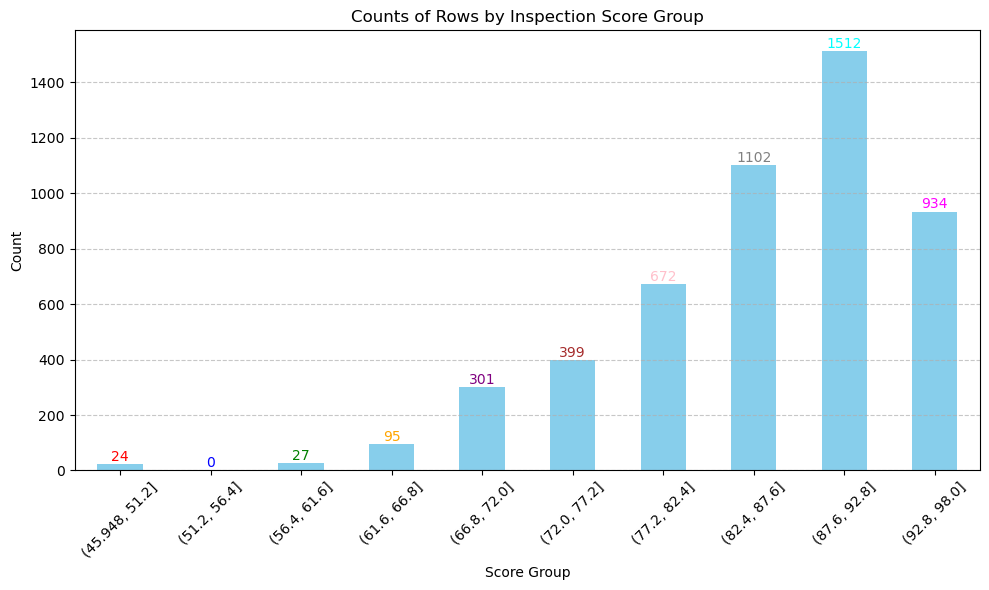

In [21]:
plt.figure(figsize=(10, 6))
ax = grouped_by_score_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Rows by Inspection Score Group')
plt.xlabel('Score Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define colors for annotations
annotation_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Annotate bars with their respective counts and adjust text color
for i, (count, color) in enumerate(zip(grouped_by_score_counts, annotation_colors)):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', color=color)

plt.tight_layout()
plt.show()

* #### Let's look for the Highest score and Lowest with all information and the top 3 und bottom 3 also

In [22]:
max_inspection_score_row_index = df['inspection_score'].idxmax()
max_inspection_score_row = df.loc[max_inspection_score_row_index]
print(max_inspection_score_row)

business_id                                                          5854
business_city                                               San Francisco
business_state                                                         CA
inspection_date                                    02/27/2018 12:00:00 AM
inspection_score                                                     98.0
inspection_type                                     Routine - Unscheduled
violation_description    Unapproved or unmaintained equipment or utensils
risk_category                                                    Low Risk
public_health_effect                                    no immediate risk
Name: 357, dtype: object


In [23]:

df['inspection_date'] = pd.to_datetime(df['inspection_date'])
df['inspection_year'] = df['inspection_date'].dt.year
time_interval = df.loc[df.groupby('inspection_year')['inspection_score'].idxmax()]
time_interval = time_interval[['inspection_year', 'inspection_date', 'inspection_score', 'inspection_type']]

# Print the result
print(time_interval)


      inspection_year inspection_date  inspection_score        inspection_type
2588             2016      2016-11-03              98.0  Routine - Unscheduled
1178             2017      2017-10-30              98.0  Routine - Unscheduled
357              2018      2018-02-27              98.0  Routine - Unscheduled
529              2019      2019-06-19              98.0  Routine - Unscheduled


In [24]:
min_inspection_score_index = df['inspection_score'].idxmin()
min_inspection_score_row = df.loc[min_inspection_score_index]
print(min_inspection_score_row)

business_id                                                           1154
business_city                                                San Francisco
business_state                                                          CA
inspection_date                                        2019-03-27 00:00:00
inspection_score                                                      46.0
inspection_type                                      Routine - Unscheduled
violation_description    Inadequate and inaccessible handwashing facili...
risk_category                                                Moderate Risk
public_health_effect                                             Diggyness
inspection_year                                                       2019
Name: 122, dtype: object


In [25]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

df['inspection_year'] = df['inspection_date'].dt.year

min_inspection_interval = df.loc[df.groupby('inspection_year')['inspection_score'].idxmin()]
min_inspection_interval = min_inspection_interval[['inspection_year', 'inspection_date', 'inspection_score', 'inspection_type']]

print(min_inspection_interval)



       inspection_year inspection_date  inspection_score  \
1024              2016      2016-11-01              67.0   
1156              2017      2017-04-07              60.0   
19044             2018      2018-09-14              51.0   
122               2019      2019-03-27              46.0   

             inspection_type  
1024   Routine - Unscheduled  
1156   Routine - Unscheduled  
19044  Routine - Unscheduled  
122    Routine - Unscheduled  


In [26]:
df_yearly= df.loc[df.groupby(['inspection_date', 'inspection_score', 'public_health_effect'])['inspection_score'].transform('count') > 1]
df_yearly

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018
213,59044,San Francisco,CA,2018-01-22,78.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2018
...,...,...,...,...,...,...,...,...,...,...
37851,71909,San Francisco,CA,2019-02-20,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2019
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017


In [27]:
# Extracting year from inspection_date
df['inspection_year'] = pd.to_datetime(df['inspection_date']).dt.year

# Grouping by inspection_year
grouped_by_year = df.groupby('inspection_year')

# Getting the counts for each year group
grouped_by_year_counts = grouped_by_year.size()
grouped_by_year_counts

inspection_year
2016     382
2017    1655
2018    1619
2019    1410
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


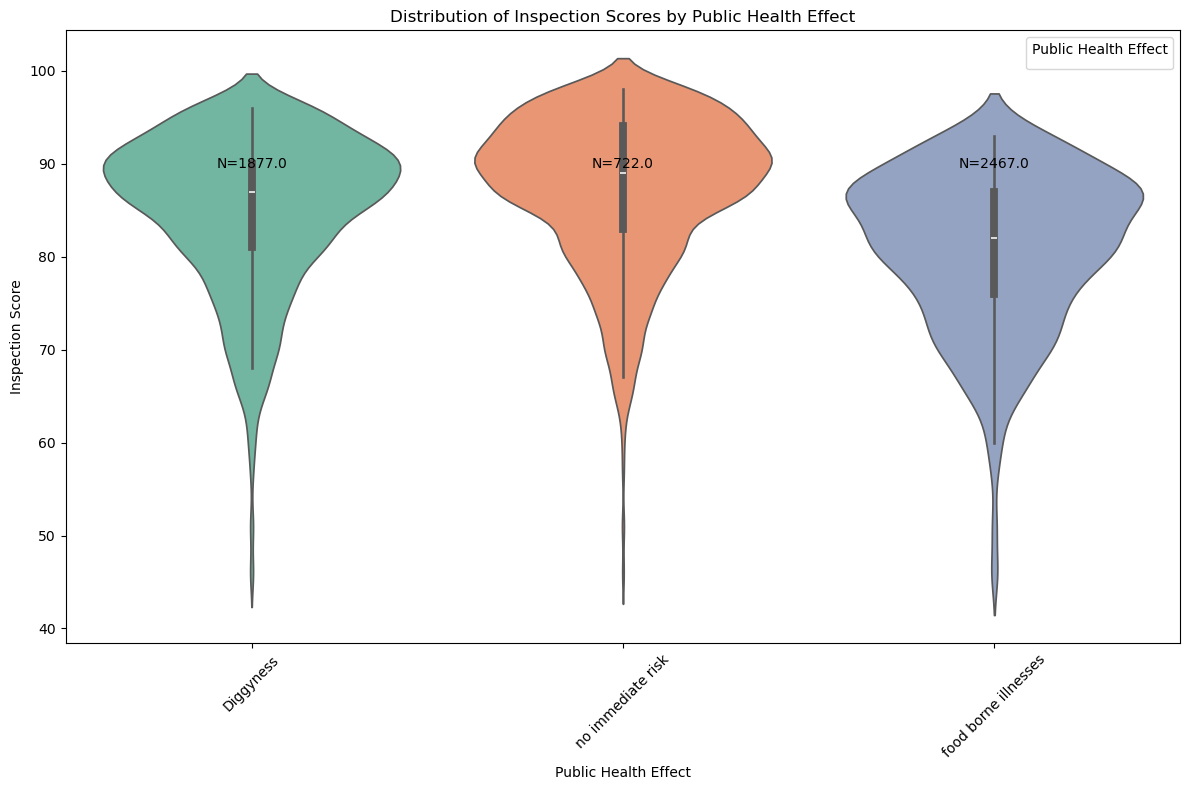

In [28]:
# Group by 'public_health_effect' and calculate summary statistics for 'inspection_score'
grouped_df = df.groupby('public_health_effect')['inspection_score'].describe().reset_index()

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='public_health_effect', y='inspection_score', data=df, hue='public_health_effect', palette='Set2')
plt.title('Distribution of Inspection Scores by Public Health Effect')
plt.xlabel('Public Health Effect')
plt.ylabel('Inspection Score')
plt.xticks(rotation=45)
plt.legend(title='Public Health Effect')

# Adding annotations for number of inspections
for i, cat in enumerate(grouped_df['public_health_effect'].unique()):
    count = grouped_df[grouped_df['public_health_effect'] == cat]['count'].iloc[0]
    plt.text(i, 90, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()


* ## Inspeting more
* #### I want to count violation_description, and  put in which public_health_effect
* ####  where I want to see in which inspection they come and also add inspection_date
* #### For that I am selecting another column to get more information
* violation_description	risk_category	public_health_effect inspection_date	inspection_score
* for that I am doing some more steps, which are
* #### 1 Categorising Inspection score as responce_result where under 60 as Fail('No) and above 60 as Pass(Yes)
* #### 2 Counting response result as risk_category
* #### 3 Ploting separately and counting all inspection_scores with each risk_categoryy , they are Pass or not
* #### 4 giving ratings high risk as 0 , meditate risk as 3,5 and Low risk as 5 star
* #### 5 Looking with fail also they got ratings or not
* #### 6 what is the reason behind , even after fail they are having nice rating?
* it givs the result, in which (public_health_effect) , we can look this with violation_category
* #### Now doing one more time Data featuring in violation_category

In [29]:
df["responce_result"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "NO"
    else:
        return "Yes"

df["responce_result"] = df["inspection_score"].apply(lambda x : advisor (x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes
...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes


#### 2 Counting response result as risk_category 

In [30]:
responce_count = df.groupby('responce_result').size().reset_index(name='count')
risck_responce = df.groupby(['risk_category','responce_result']).apply(list).reset_index()
display(risck_responce)


,risk_category,responce_result,0
0,High Risk,NO,"[business_id, business_city, business_state, i..."
1,High Risk,Yes,"[business_id, business_city, business_state, i..."
2,Low Risk,NO,"[business_id, business_city, business_state, i..."
3,Low Risk,Yes,"[business_id, business_city, business_state, i..."
4,Moderate Risk,NO,"[business_id, business_city, business_state, i..."
5,Moderate Risk,Yes,"[business_id, business_city, business_state, i..."


 #### 3 Ploting separately and counting all inspection_scores with each risk_categoryy , they are Pass or not
 i have to redo it , because i have all this value there

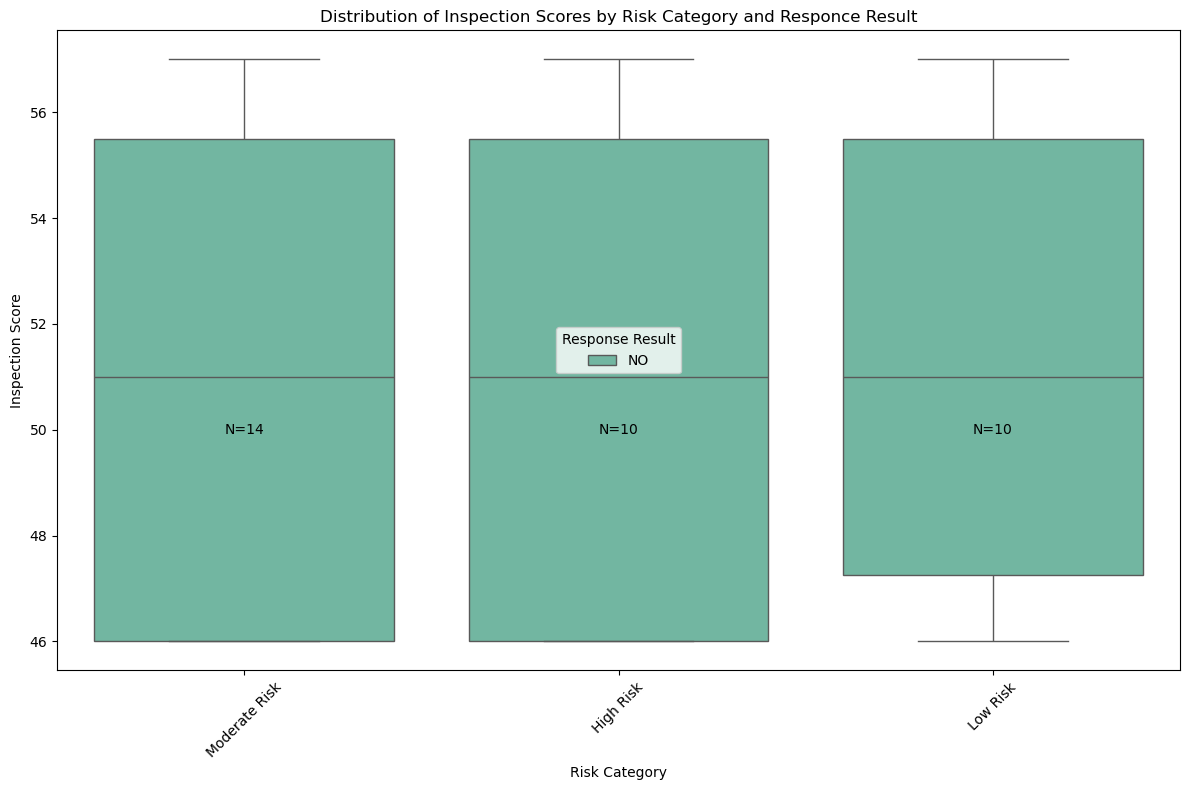

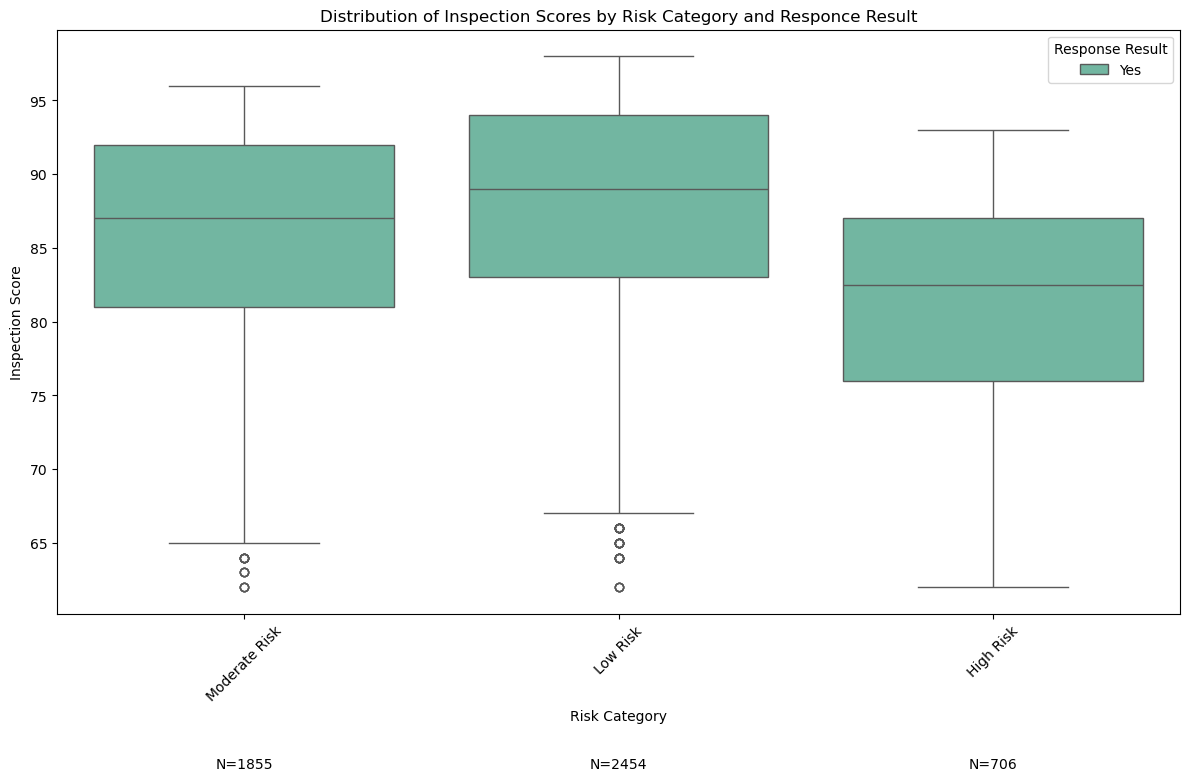

In [31]:
filtered_df = df[(df['inspection_score'] < 60) & df['risk_category'].notnull()]
plt.figure(figsize=(12, 8))

# Plot for inspection scores < 60
sns.boxplot(x='risk_category', y='inspection_score', hue='responce_result', data=filtered_df, palette='Set2')
plt.title('Distribution of Inspection Scores by Risk Category and Responce Result')
plt.xlabel('Risk Category')
plt.ylabel('Inspection Score')
plt.legend(title='Response Result')
plt.xticks(rotation=45)

# Adding annotations for number of inspections
for i, cat in enumerate(filtered_df['risk_category'].unique()):
    count = filtered_df[filtered_df['risk_category'] == cat]['inspection_score'].count()
    plt.text(i, 50, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()

filtered_df_1 = df[(df['inspection_score'] > 60) & df['risk_category'].notnull()]
plt.figure(figsize=(12, 8))

# Plot for inspection scores < 60
sns.boxplot(x='risk_category', y='inspection_score', hue='responce_result', data=filtered_df_1, palette='Set2')
plt.title('Distribution of Inspection Scores by Risk Category and Responce Result')
plt.xlabel('Risk Category')
plt.ylabel('Inspection Score')
plt.legend(title='Response Result')
plt.xticks(rotation=45)

# Adding annotations for number of inspections
for i, cat in enumerate(filtered_df_1['risk_category'].unique()):
    count = filtered_df_1[filtered_df_1['risk_category'] == cat]['inspection_score'].count()
    plt.text(i, 50, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()


#### 4 giving ratings high risk as 0 , meditate risk as 3,5 and Low risk as 5 star

In [32]:
df["ratings"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "0"
    elif risk_category in ['Moderate Risk']:
        return "3.5 "
    else:
        return "5 "

df["ratings"] = df["risk_category"].apply(lambda x : advisor (x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result,ratings
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes,3.5
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes,3.5
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes,5
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes,5
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes,5
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes,3.5


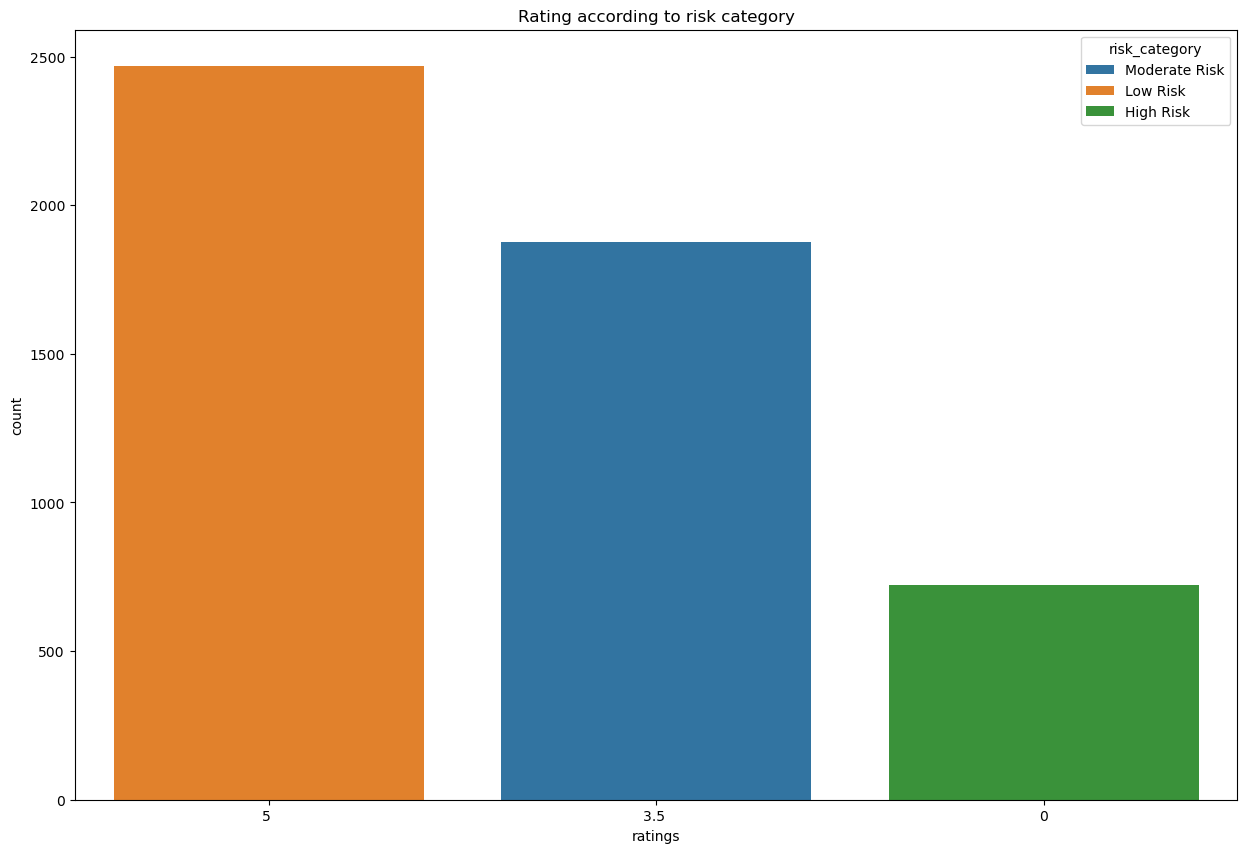

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x='ratings', hue='risk_category', data=df, order=df['ratings'].value_counts().index)
plt.title('Rating according to risk category')
plt.show()

In [34]:

response_counts = df.groupby('ratings')['responce_result'].value_counts().unstack().fillna(0)

print(response_counts)


responce_result  NO   Yes
ratings                  
0                10   712
3.5              14  1863
5                10  2457


* #### 6 Ploting it with 2 different Plot No and Yes even they got pass

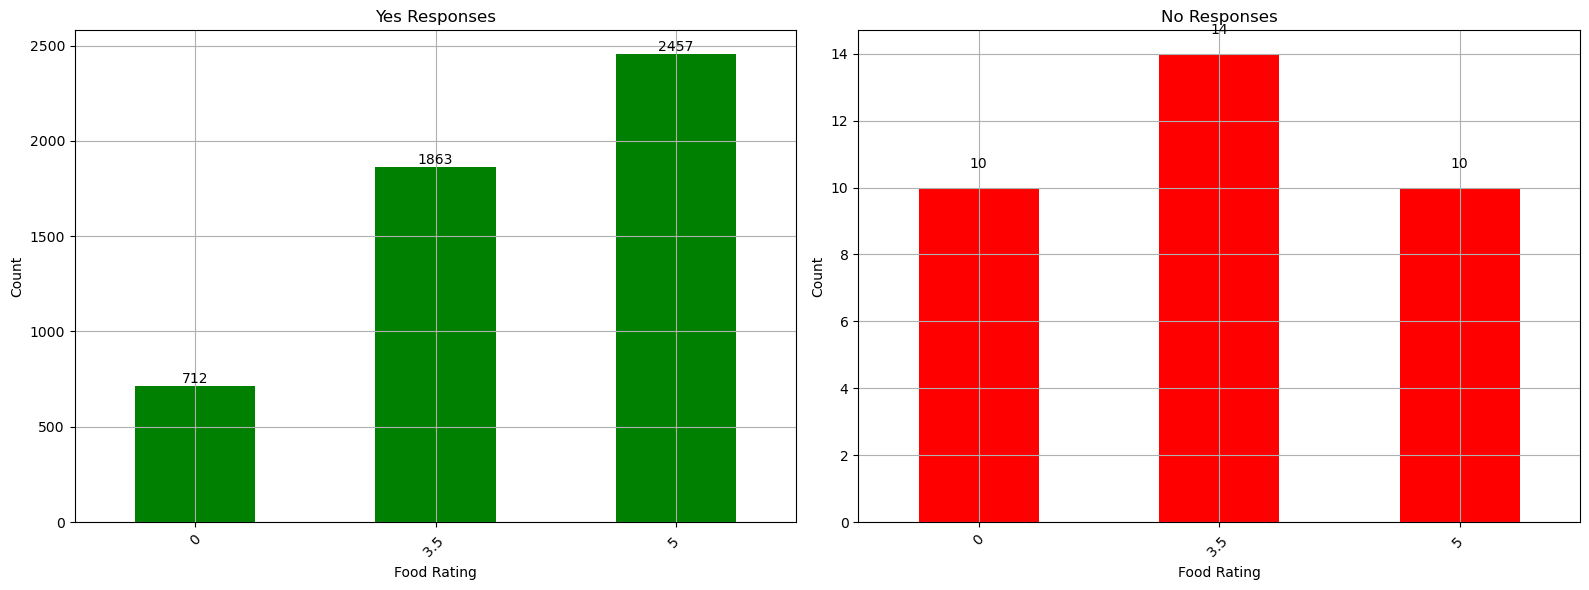

In [35]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting 'Yes' responses
response_counts['Yes'].plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Yes Responses')
axes[0].set_xlabel('Food Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(response_counts.index, rotation=45)
axes[0].grid(True)

# Add count labels on the bars for 'Yes' responses
for index, value in enumerate(response_counts['Yes']):
    axes[0].text(index, value + 0.5, str(value), ha='center', va='bottom')

# Plotting 'No' responses
response_counts['NO'].plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('No Responses')
axes[1].set_xlabel('Food Rating')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(response_counts.index, rotation=45)
axes[1].grid(True)

# Add count labels on the bars for 'No' responses
for index, value in enumerate(response_counts['NO']):
    axes[1].text(index, value + 0.5, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* #### 7 what is the reason behind , even after fail they are having nice rating?
* it givs the result, in which (public_health_effect) , we can look this with violation_category
* For that I am talking time and Categorising all diffrent violation_category in 9 different violation_category so ,
   it is easy to get bette clean feture.

* #### Now doing one more time Data featuring in violation_category

## * Crating 'violation_category'

In [36]:
def advisor(violation_description):
    if violation_description in ['Unclean or degraded floors walls or ceilings',
                                 'Inadequately cleaned or sanitized food contact surfaces',
                                 'Wiping cloths not clean or properly stored or inadequate sanitizer',
                                 'Unclean nonfood contact surfaces',
                                 'Unclean or unsanitary food contact surfaces',
                                 'Unclean hands or improper use of gloves',
                                 'Unclean unmaintained or improperly constructed toilet facilities',
                                 'Unsanitary employee garments hair or nails']:
        return "unclean"
    elif violation_description in ['Unapproved or unmaintained equipment or utensils',
                                   'Inadequate and inaccessible handwashing facilities',
                                   'Inadequate warewashing facilities or equipment',
                                   'No thermometers or uncalibrated thermometers']:
        return "lack of equipment"
    elif violation_description in ['Moderate risk food holding temperature',
                                   'High risk food holding temperature',
                                   'Insufficient hot water or running water',
                                   'Improper cooling methods',
                                   'No hot water or running water']:
        return "Under Temperature"
    elif violation_description in ['Moderate risk vermin infestation',
                                   'Foods not protected from contamination',
                                   'Low risk vermin infestation',
                                   'Contaminated or adulterated food',
                                   'High risk vermin infestation',
                                   'Sewage or wastewater contamination']:
        return "Contaminated"
    elif violation_description in ['Improper food storage',
                                   'Improper storage of equipment utensils or linens',
                                   'Improper thawing methods',
                                   'Improper storage use or identification of toxic substances',
                                   'Inadequate dressing rooms or improper storage of personal items',
                                   'Reservice of previously served foods',
                                   'No person in charge of food facility',
                                   'Unapproved living quarters in food facility',
                                   'Unapproved food source',
                                   'Other moderate risk violation',
                                   'Other high risk violation']:
        return "Unmanage"
    elif violation_description in ['Food safety certificate or food handler card not available',
                                   'Inadequate food safety knowledge or lack of certified food safety manager',
                                   'Permit license or inspection report not posted',
                                   'Other low risk violation',
                                   'Noncompliance with HAACP plan or variance',
                                   'Improper food labeling or menu misrepresentation',
                                   'Inadequate procedures or records for time as a public health control',
                                   'Inadequate or unsanitary refuse containers or area or no garbage service',
                                   'No plan review or Building Permit',
                                   'Unauthorized or unsafe use of time as a public health control measure',
                                   'Worker safety hazards',
                                   'Non service animal',
                                   'Unpermitted food facility',
                                   'Inadequate HACCP plan record keeping']:
        return "Lack Certificate"
    elif violation_description in ['Improper or defective plumbing', 'Inadequate ventilation or lighting']:
        return "UnderMaintenance"
    elif violation_description in ['Employee eating or smoking',
                                   'Food in poor condition',
                                   'Improper reheating of food',
                                   'Noncompliance with shell fish tags or display',
                                   'Inadequate sewage or wastewater disposal']:
        return "untrained worker"
    elif violation_description in ['Low Risk', 'Moderate Risk']:
        return "expire-food reserve"
    else:
        return "not convinced"

df["violation_Category"] = df["violation_description"].apply(lambda x: advisor(x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result,ratings,violation_Category
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes,3.5,Contaminated
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes,3.5,Under Temperature
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5,lack of equipment
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes,5,unclean
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes,5,unclean
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes,5,Contaminated
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes,3.5,unclean


#### I am exporting it as csv because i want to do Tableau visulisation

In [37]:
df.to_csv('inspection_score.csv')

In [38]:
#count violation_Category
df["violation_Category"].value_counts()

violation_Category
unclean              1556
Contaminated          807
lack of equipment     769
Under Temperature     753
Lack Certificate      476
Unmanage              472
UnderMaintenance      144
untrained worker       85
not convinced           4
Name: count, dtype: int64

In [39]:
df["responce_result"].value_counts()

responce_result
Yes    5032
NO       34
Name: count, dtype: int64

responce_result = no 

In [40]:
#no_responses = df[df['responce_result'] == 'NO'][['ratings', 'violation_Category']]
#print(no_responses)


## * grouping violation _category with rating 
* And Look at the coont value and plot it also in garph

In [41]:
grouped_rating_violation = df.groupby(['ratings', 'violation_Category']).size().reset_index(name='count')
print(grouped_rating_violation)


   ratings violation_Category  count
0        0       Contaminated    132
1        0   Lack Certificate      4
2        0  Under Temperature    311
3        0           Unmanage      5
4        0            unclean    256
5        0   untrained worker     14
6     3.5        Contaminated    489
7     3.5    Lack Certificate    165
8     3.5   Under Temperature    442
9     3.5            Unmanage     88
10    3.5   lack of equipment    283
11    3.5             unclean    339
12    3.5    untrained worker     71
13      5        Contaminated    186
14      5    Lack Certificate    307
15      5    UnderMaintenance    144
16      5            Unmanage    379
17      5   lack of equipment    486
18      5       not convinced      4
19      5             unclean    961


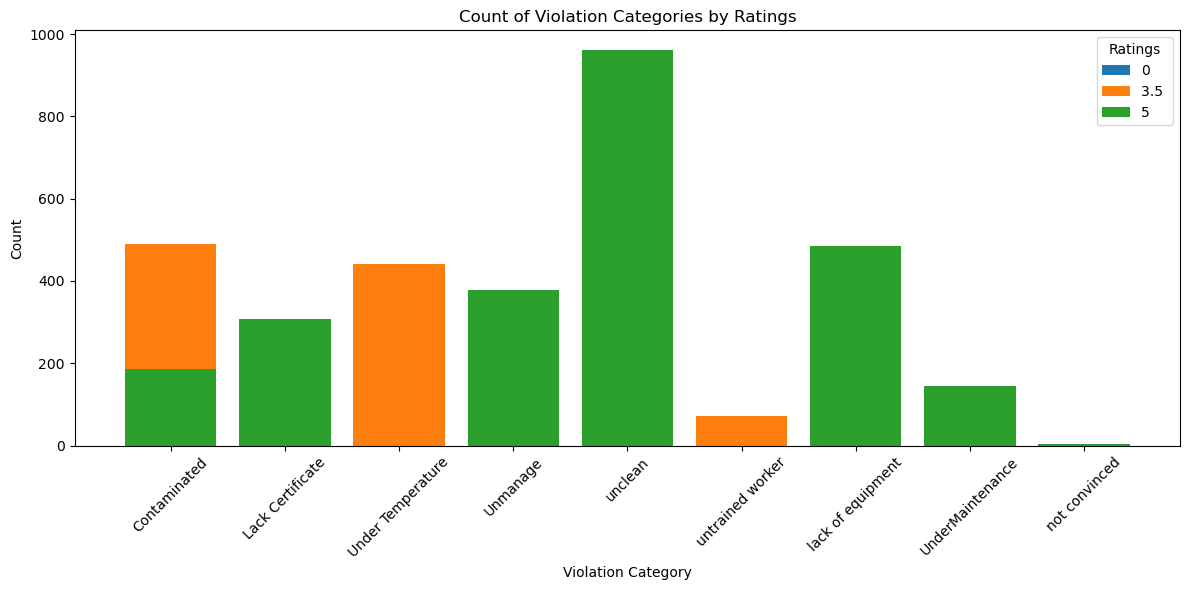

In [42]:

# Plotting
plt.figure(figsize=(12, 6))
for rating in grouped_rating_violation['ratings'].unique():
    subset = grouped_rating_violation[grouped_rating_violation['ratings'] == rating]
    plt.bar(subset['violation_Category'], subset['count'], label=rating)

plt.xlabel('Violation Category')
plt.ylabel('Count')
plt.title('Count of Violation Categories by Ratings')
plt.xticks(rotation=45)
plt.legend(title='Ratings')
plt.tight_layout()
plt.show()


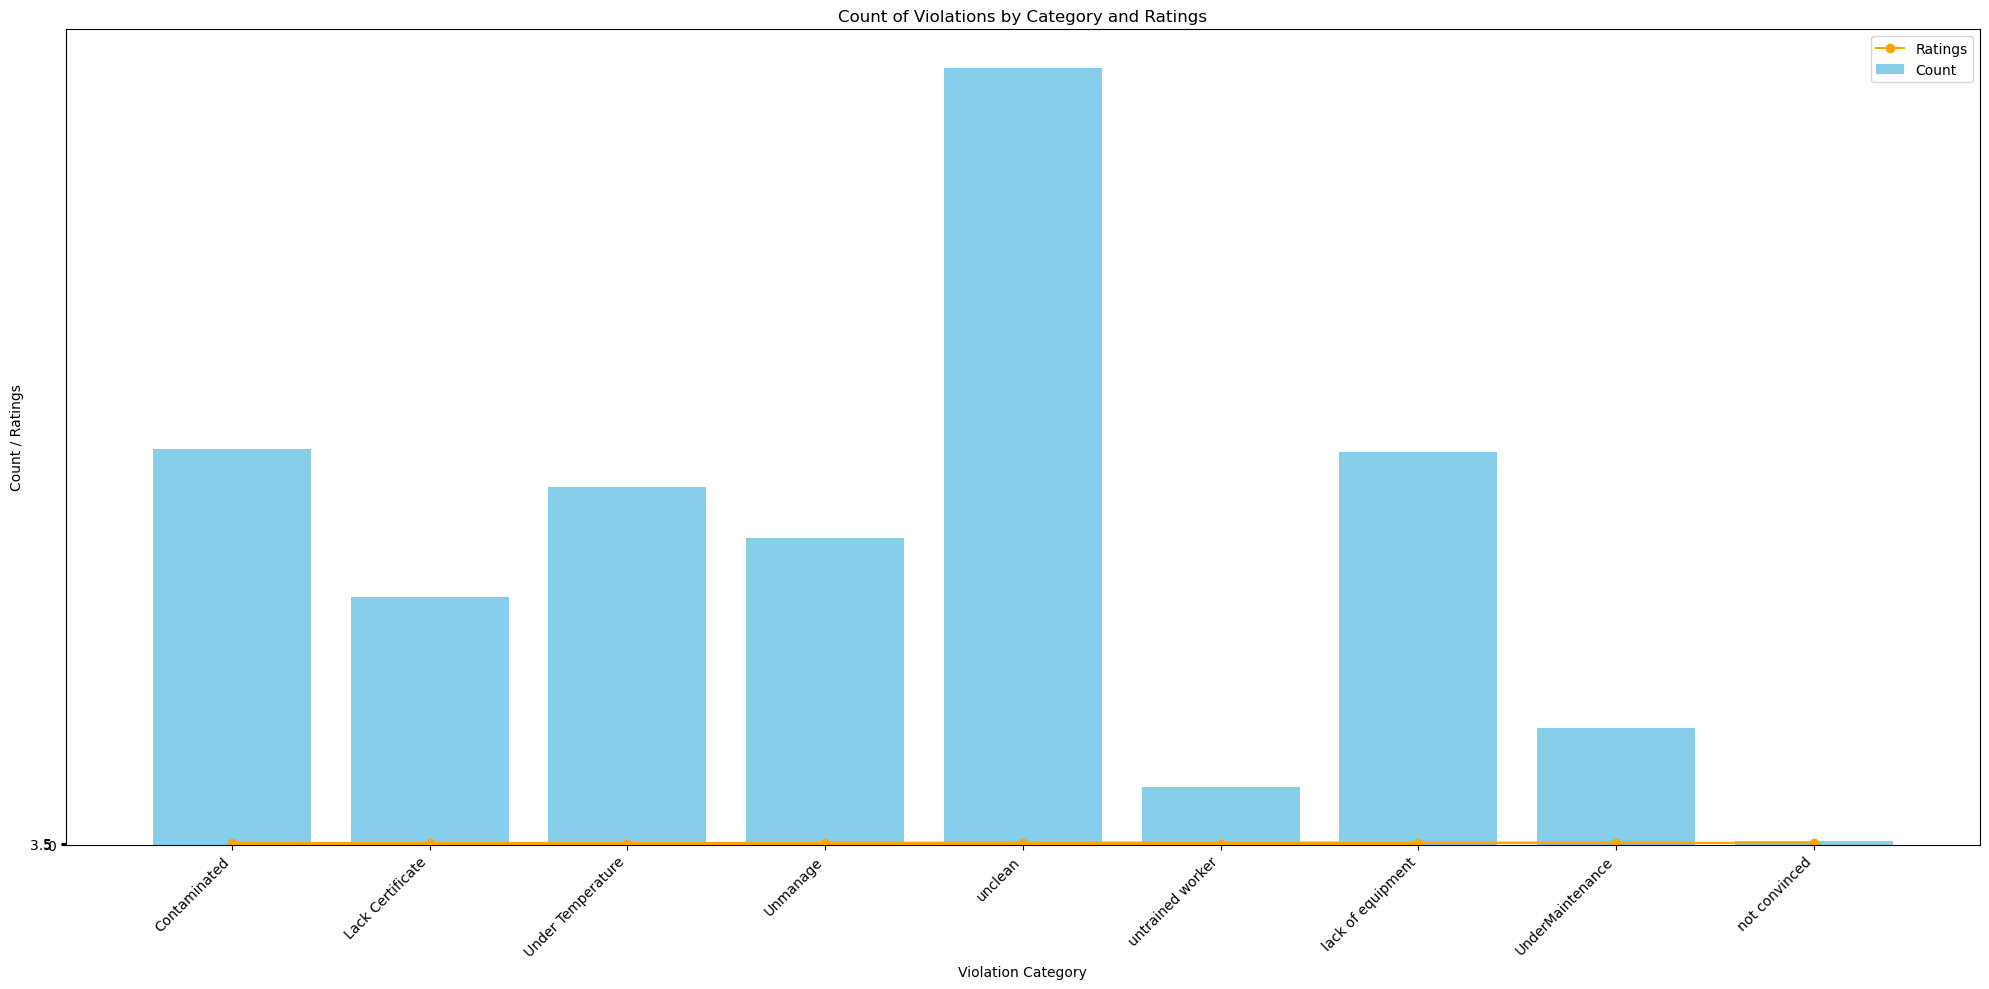

In [47]:

df1 = pd.DataFrame(grouped_rating_violation)

# Plot
plt.figure(figsize=(20, 10))  
plt.bar(df1['violation_Category'], df1['count'], color='skyblue', label='Count')
plt.plot(df1['violation_Category'], df1['ratings'], marker='o', color='orange', label='Ratings')
plt.xlabel('Violation Category')
plt.ylabel('Count / Ratings')
plt.title('Count of Violations by Category and Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

## * grouping violation _category with response also
* Look at the count value and plot it also in the graph

In [48]:
#grouped_responce_violation = no_responses.groupby(['responce_result', 'violation_Category']).size().reset_index(name='count')
#print(grouped_responce_violation)


## Now we are in the final why even they got No or they fail but also have nice rating 

* For that I am taking -responce_result,ratings,violation_Category,risk_category(execptional. because rating comes under it) 

In [49]:
grouped_responce_violation = df.groupby(['responce_result', 'violation_Category']).size().reset_index(name='count')

print(grouped_responce_violation)


   responce_result violation_Category  count
0               NO       Contaminated      4
1               NO   Lack Certificate      4
2               NO  Under Temperature      5
3               NO           Unmanage      5
4               NO  lack of equipment      6
5               NO            unclean      8
6               NO   untrained worker      2
7              Yes       Contaminated    803
8              Yes   Lack Certificate    472
9              Yes  Under Temperature    748
10             Yes   UnderMaintenance    144
11             Yes           Unmanage    467
12             Yes  lack of equipment    763
13             Yes      not convinced      4
14             Yes            unclean   1548
15             Yes   untrained worker     83


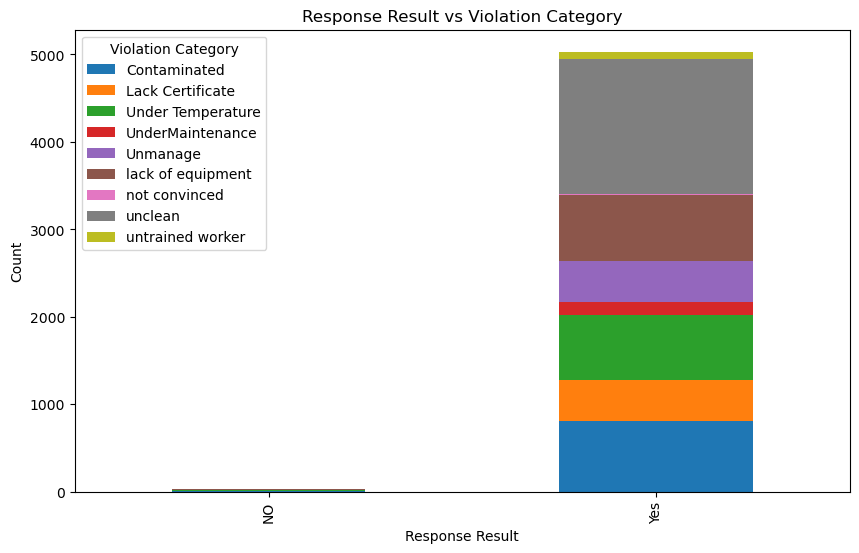

In [50]:

grouped_responce_violation = df.groupby(['responce_result', 'violation_Category']).size().reset_index(name='count')


pivot_table = grouped_responce_violation.pivot(index='responce_result', columns='violation_Category', values='count')

# Create a bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))  # Enlarged size
plt.xlabel('Response Result')
plt.ylabel('Count')
plt.title('Response Result vs Violation Category')
plt.legend(title='Violation Category')
plt.show()

#### Final Step to get result 
## Final we want to se result of responce_result, ratings,violation_Category
* From this we can se even they got under 60 mask , they got nice rating because,
  the resurent are in moderate risk and low risk, so they got nice rating, so we can see which violation they are in.

In [51]:
df.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_date',
       'inspection_score', 'inspection_type', 'violation_description',
       'risk_category', 'public_health_effect', 'inspection_year',
       'responce_result', 'ratings', 'violation_Category'],
      dtype='object')

In [52]:
final_result= df.groupby(['responce_result','ratings','violation_Category']).size().reset_index(name='count')
final_result

,responce_result,ratings,violation_Category,count
0,NO,0,Contaminated,1
1,NO,0,Under Temperature,4
2,NO,0,unclean,5
3,NO,3.5,Contaminated,3
4,NO,3.5,Lack Certificate,3
5,NO,3.5,Under Temperature,1
6,NO,3.5,Unmanage,3
7,NO,3.5,lack of equipment,2
8,NO,3.5,untrained worker,2
9,NO,5,Lack Certificate,1


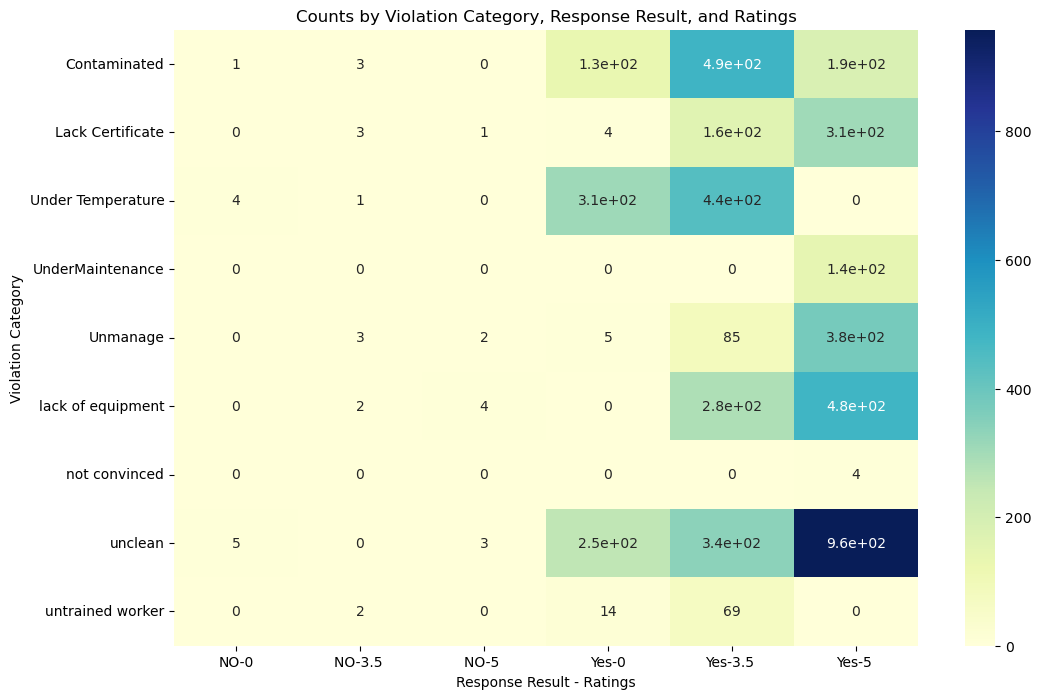

In [62]:

# Pivot the DataFrame for better visualization
pivot_df = final_result.pivot_table(index='violation_Category', columns=['responce_result', 'ratings'], values='count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.title('Counts by Violation Category, Response Result, and Ratings')
plt.xlabel('Response Result - Ratings')
plt.ylabel('Violation Category')
plt.show()


* I want to see top 3 inspection_score with all column

In [63]:
# DataFrame by 'inspection_score' 
df_sorted = df.sort_values(by='inspection_score', ascending=True)

top_3_low_scores = df_sorted.head(3)

# Create a DataFrame with selected columns
top_3_inspection_data = pd.DataFrame({
    'Business ID': top_3_low_scores['business_id'],
    'City': top_3_low_scores['business_city'],
    'State': top_3_low_scores['business_state'],
    'Inspection Date': top_3_low_scores['inspection_date'],
    'Inspection Score': top_3_low_scores['inspection_score'],
    'Inspection Type': top_3_low_scores['inspection_type'],
    'Violation Description': top_3_low_scores['violation_description'],
    'Risk Category': top_3_low_scores['risk_category'],
    'Public Health Effect': top_3_low_scores['public_health_effect'],
    'Inspection Year': top_3_low_scores['inspection_year'],
    'Response Result': top_3_low_scores['responce_result'],
    'Ratings': top_3_low_scores['ratings'],
    'Violation Category': top_3_low_scores['violation_Category']
})

display(top_3_inspection_data)


,Business ID,City,State,Inspection Date,Inspection Score,Inspection Type,Violation Description,Risk Category,Public Health Effect,Inspection Year,Response Result,Ratings,Violation Category
12852,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Unclean or unsanitary food contact surfaces,High Risk,food borne illnesses,2019,NO,0,unclean
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5,lack of equipment
3043,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,High risk food holding temperature,High Risk,food borne illnesses,2019,NO,0,Under Temperature


### Now Going for the Prediction before that 
* Reload the data
* See all Numerical and categorical value and column
* let's see co relation,

In [64]:
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result,ratings,violation_Category
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes,3.5,Contaminated
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes,3.5,Under Temperature
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5,lack of equipment
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes,5,unclean
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes,5,unclean
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes,5,Contaminated
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes,3.5,unclean


#### Corelation in numerical column

In [65]:
# Selecting only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_data = df[numeric_columns]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

,inspection_score,inspection_year
inspection_score,1.000000,-0.049818
inspection_year,-0.049818,1.000000


In [66]:

correlation_matrix = numeric_data.corr().abs()
correlation_matrix

,inspection_score,inspection_year
inspection_score,1.000000,0.049818
inspection_year,0.049818,1.000000


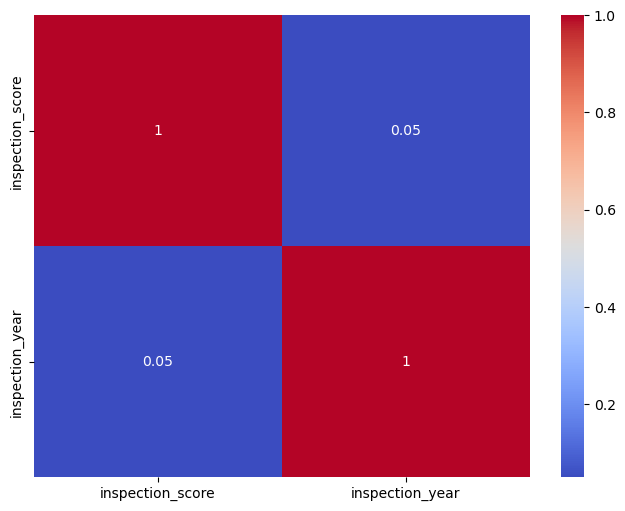

In [67]:
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [68]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,business_id,business_city,business_state,inspection_type,violation_description,risk_category,public_health_effect,responce_result,ratings,violation_Category
110,3649,San Francisco,CA,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,Yes,3.5,Contaminated
119,184,San Francisco,CA,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,Yes,3.5,Under Temperature
122,1154,San Francisco,CA,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,NO,3.5,lack of equipment
123,1636,San Francisco,CA,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,Yes,5,unclean
173,7764,San Francisco,CA,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,Yes,5,unclean
...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,Yes,5,unclean
38042,68442,San Francisco,CA,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,Yes,5,Contaminated
38045,67330,San Francisco,CA,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,Yes,5,unclean
38099,69769,San Francisco,CA,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,Yes,3.5,unclean


In [69]:
categorical_columns.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_type',
       'violation_description', 'risk_category', 'public_health_effect',
       'responce_result', 'ratings', 'violation_Category'],
      dtype='object')

In [70]:
cat_col= df[['business_city', 'business_state', 'inspection_type', 'risk_category', 'public_health_effect',
            'ratings', 'violation_Category','responce_result','inspection_score']]
cat_col

,business_city,business_state,inspection_type,risk_category,public_health_effect,ratings,violation_Category,responce_result,inspection_score
110,San Francisco,CA,Routine - Unscheduled,Moderate Risk,Diggyness,3.5,Contaminated,Yes,82.0
119,San Francisco,CA,Routine - Unscheduled,Moderate Risk,Diggyness,3.5,Under Temperature,Yes,90.0
122,San Francisco,CA,Routine - Unscheduled,Moderate Risk,Diggyness,3.5,lack of equipment,NO,46.0
123,San Francisco,CA,Routine - Unscheduled,Low Risk,no immediate risk,5,unclean,Yes,88.0
173,San Francisco,CA,Routine - Unscheduled,Low Risk,no immediate risk,5,unclean,Yes,90.0
...,...,...,...,...,...,...,...,...,...
37965,San Francisco,CA,Routine - Unscheduled,Low Risk,no immediate risk,5,unclean,Yes,84.0
38042,San Francisco,CA,Routine - Unscheduled,Low Risk,no immediate risk,5,Contaminated,Yes,88.0
38045,San Francisco,CA,Routine - Unscheduled,Low Risk,no immediate risk,5,unclean,Yes,88.0
38099,San Francisco,CA,Routine - Unscheduled,Moderate Risk,Diggyness,3.5,unclean,Yes,88.0


## Let's do a Prediction and use some method to do a prediction
* As Andrea told me to use  
* DecisionTreeClassifier
 looking for accuracy, where my target is from starting inspection score but I am doing in response also.
* I am using Logistic regression also 
let's see, if the accuracy did not got nice I will do further research
* Using SMOTE also

* features = ['business_city', 'business_state', 'inspection_type', 'risk_category','responce_result', 'public_health_effect',
            'ratings', 'violation_Category']
* target = 'inspection_score'

In [82]:
features = ['business_city', 'business_state', 'inspection_type', 'risk_category','responce_result', 'public_health_effect',
            'ratings', 'violation_Category']
target = 'inspection_score'

# features (X) and the target variable (y)
X = df[features]
y = df[target]

# Performing one-hot encoding for categorical variables in X
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = model.predict(X_train)

# Making predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.13845014807502468
Testing Accuracy: 0.10157790927021697


It appears that both training and testing accuracies are relatively low. 
This suggests that the model is not able to capture the underlying patterns in the data well,
neither during training nor when applied to unseen data.

This situation is indicative of underfitting

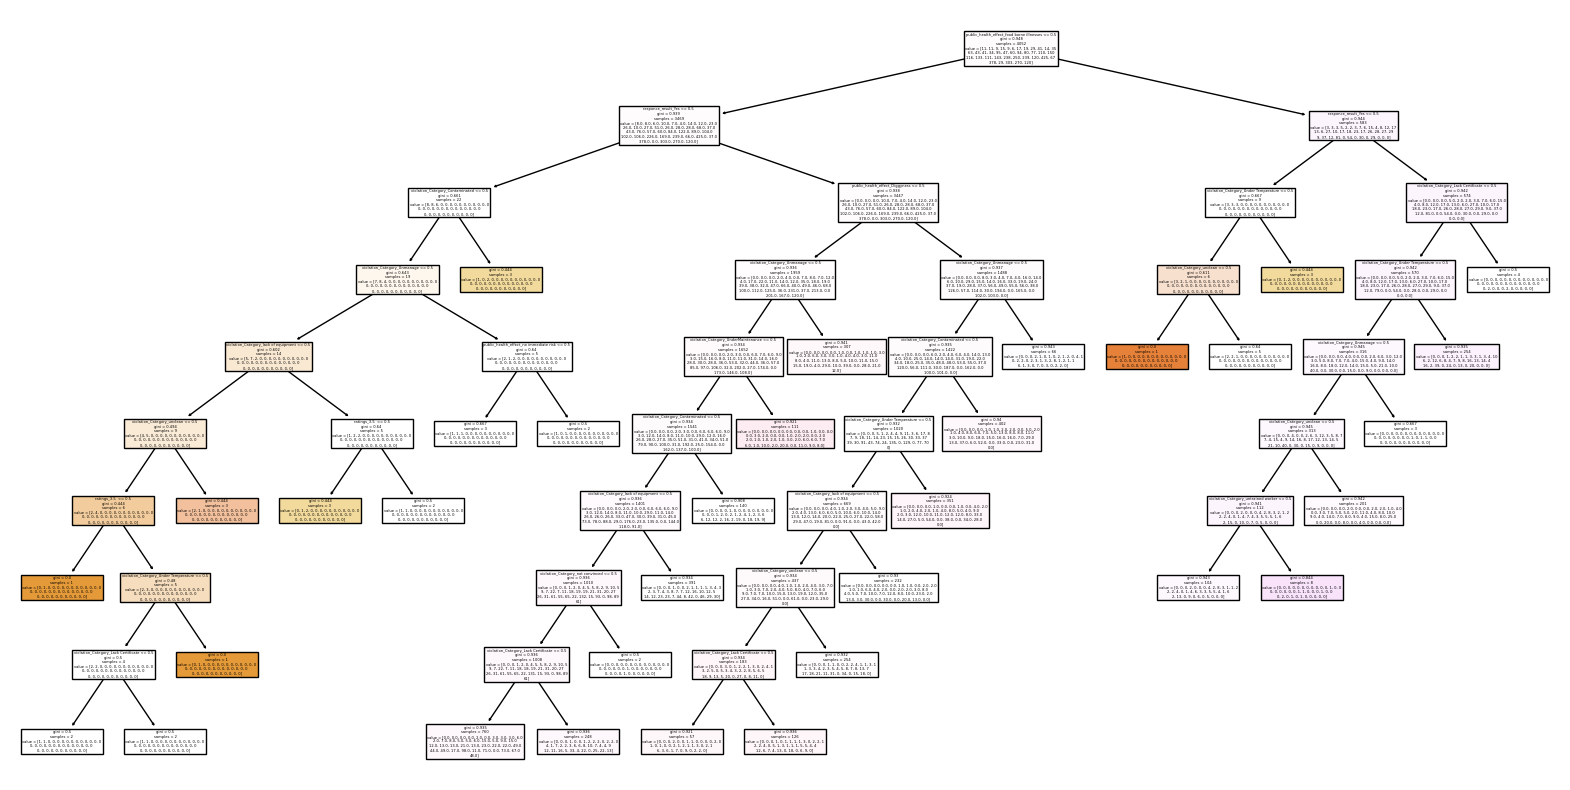

In [83]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


In [84]:
print("y_test:", y_test)


y_test: 349      96.0
28711    98.0
12885    90.0
7694     87.0
10620    71.0
         ... 
10076    78.0
1034     87.0
14027    90.0
10583    92.0
3088     87.0
Name: inspection_score, Length: 1014, dtype: float64


The **training accuracy** of **0.1338** and **testing accuracy** of **0.1055** indicate that the model's performance is quite low. Let's explore how a **decision tree** would handle this situation.

1. **Decision Tree Classifier**:
    - The **DecisionTreeClassifier** is commonly used for **classification problems** where the target variable has discrete labels (e.g., categories or classes) ².
    - Since our problem seems to involve continuous values (regression), the **DecisionTreeRegressor** would be more appropriate ¹.
    - The **mean squared error (MSE)** or **mean absolute error (MAE)** are typically used to evaluate regression models. These metrics quantify the difference between predicted and actual values.
    - The **R-squared score (R2)** is another useful metric. It measures the proportion of variance in the target variable explained by the model. An R2 score of 1 indicates a perfect fit, while lower values indicate less explanatory power ¹³.

2. **Decision Tree Regression**:
    - In regression trees, each leaf node predicts a continuous value (e.g., numeric grade, temperature, etc.).
    - The tree splits the data based on features to minimize the variance within each split.
    - The final prediction for a sample is the average value of the target variable in the corresponding leaf node.

3. **R2 Score for Decision Tree**:
    - Let's calculate the R2 score for our decision tree predictions:
        

the choice of model depends on the nature of your problem (classification vs. regression) and the type of target variable. In our case, the decision tree regression provides a more suitable evaluation metric. 🌳📊


In [85]:

features = ['business_city', 'business_state', 'inspection_type', 'risk_category', 'responce_result',
            'public_health_effect', 'ratings', 'violation_Category']
target = 'inspection_score'

X = df[features]
y = df[target]

#ne-hot encoding for categorical 
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_test_pred) * 100

print(f"R2 Score = {r2:.2f}%")


R2 Score = 10.93%


An R2 score of **10.93%** indicates that our decision tree model is not explaining much of the variance in the target variable (inspection scores). In other words, the predictions made by the decision tree are not closely aligned with the actual scores.

Here are some note what more we can do with this data

1. **Feature Engineering**:
    - Explore additional features or transformations of existing features that might better capture the relationship with the target variable.
    - Consider interactions between features or polynomial features.

2. **Model Complexity**:
    - Experiment with different hyperparameters for the decision tree (e.g., max depth, minimum samples per leaf, etc.).
    - Prune the tree to prevent overfitting.

3. **Evaluate Other Models**:
    - Decision trees might not be the best choice for your specific problem. Trying other regression models like linear regression, random forests, or gradient boosting may also givea  nice result

4. **Cross-Validation**:
    - Use cross-validation to assess the model's performance on different subsets of the data.

model performance often involves an iterative process of experimentation and evaluation. 

## Lets test this with 
* linear regression,
* random forests, or
* gradient boosting

Decision Tree:

Training Accuracy: 0.13845014807502468
Testing Accuracy: 0.10157790927021697
Interpretation: Underfitting

Linear Regression:

Training Accuracy: 0.19228469165496864
Testing Accuracy: 0.10873115003886935
Interpretation: Underfitting

Random Forest:

Training Accuracy: 0.13845014807502468
Testing Accuracy: 0.09960552268244575
Interpretation: Underfitting

Gradient Boosting:

Training Accuracy: 0.1377097729516288
Testing Accuracy: 0.09861932938856016
Interpretation: Underfitting

KNN Classifier:

Training Accuracy: 0.05454096742349457
Testing Accuracy: 0.04339250493096647

LogisticRegression


Training Accuracy: 0.13376110562685095
Testing Accuracy: 0.10552268244575937

Interpretation: Underfitting
In summary, all models, including Decision Tree, Linear Regression, Random Forest,
Gradient Boosting, and KNN Classifier, are exhibiting underfitting.
This suggests that the models are too simple to capture the underlying patterns in the data, 
resulting in poor performance on both the training and testing datasets. To address underfitting, strategies 
such as using more complex models, adding more relevant features, or tuning hyperparameters may be necessary.

## But if I change the target value with also categorical I got the result very nice.

In [94]:

features = ['business_city', 'business_state', 'inspection_type', 'risk_category', 'public_health_effect', 'ratings', 'violation_Category']
target = 'responce_result'

X = df[features]
y = df[target]

# one-hot encoding for categorical 
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)


y_test_pred = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9923494570582428
Testing Accuracy: 0.9970414201183432


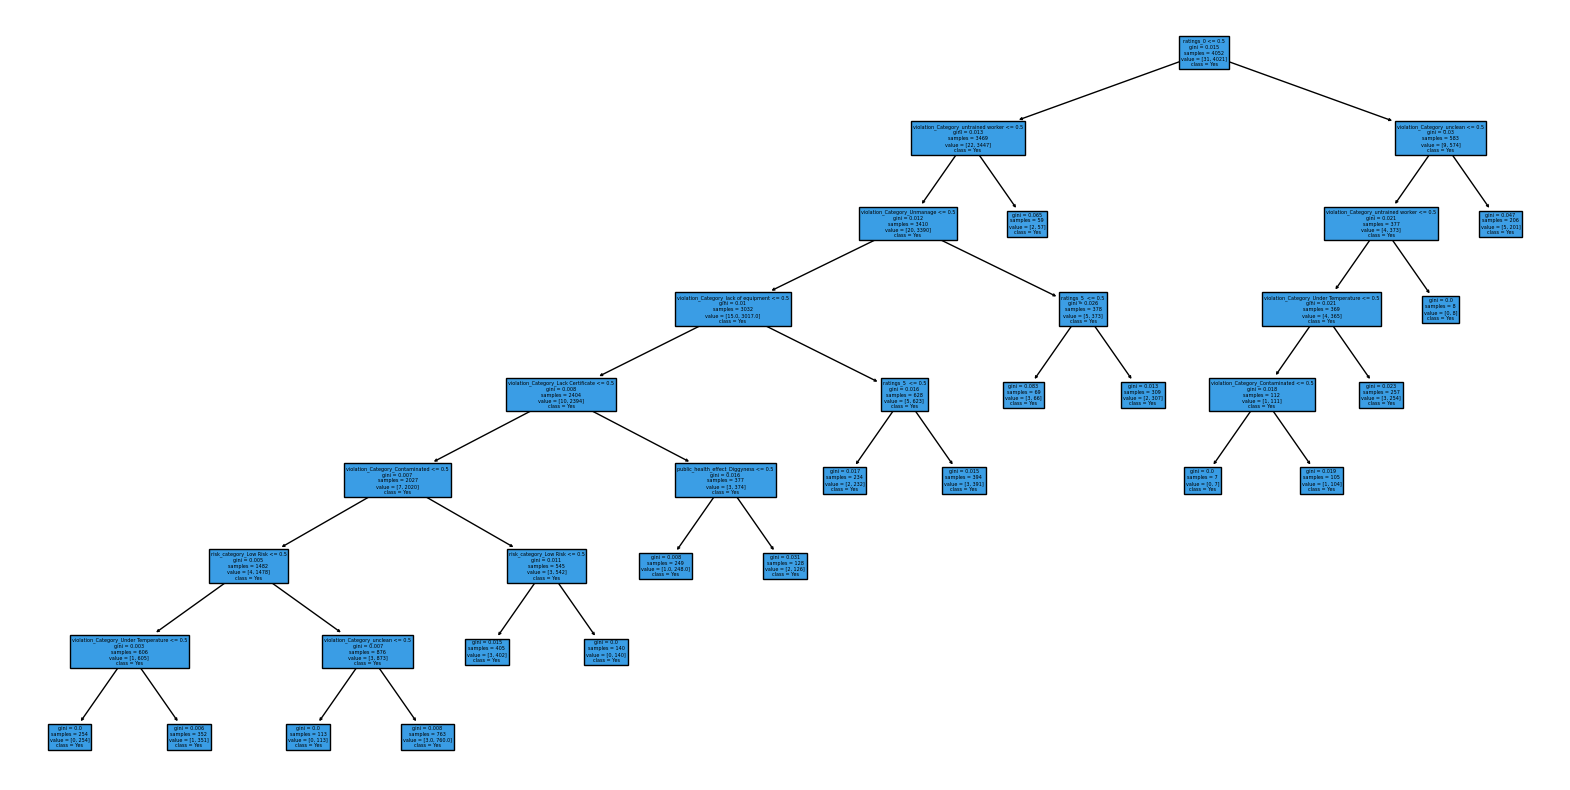

In [96]:

# Plotting the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()



#### Both the training and testing accuracies are extremely high, 
* indicating a near-perfect performance of the Decision Tree classifier on both datasets.
* overfitting

### Last Method to look for 
* SMOTE

In [100]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [108]:

X = df.drop(columns=['inspection_score']) 
y = df['inspection_score']

encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)

train_accuracy = model.score(X_train_resampled, y_train_resampled)
test_accuracy = model.score(X_test, y_test)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)


Training accuracy: 1.0
Testing accuracy: 0.5453648915187377


* Training Accuracy: 1.0 (or 100%): The model performs perfectly on the training data, indicating that it has memorized the training set.

* Testing Accuracy: 0.569: The model's performance on unseen data (testing set) is substantially lower than its performance on the training data. 
This discrepancy suggests that the model may not generalize well to new, unseen instances.
####  this model is exhibiting overfitting

In [109]:
#X_train_resampled

In [110]:
#y_train_resampled

In [111]:
#y_train_resampled.value_counts()

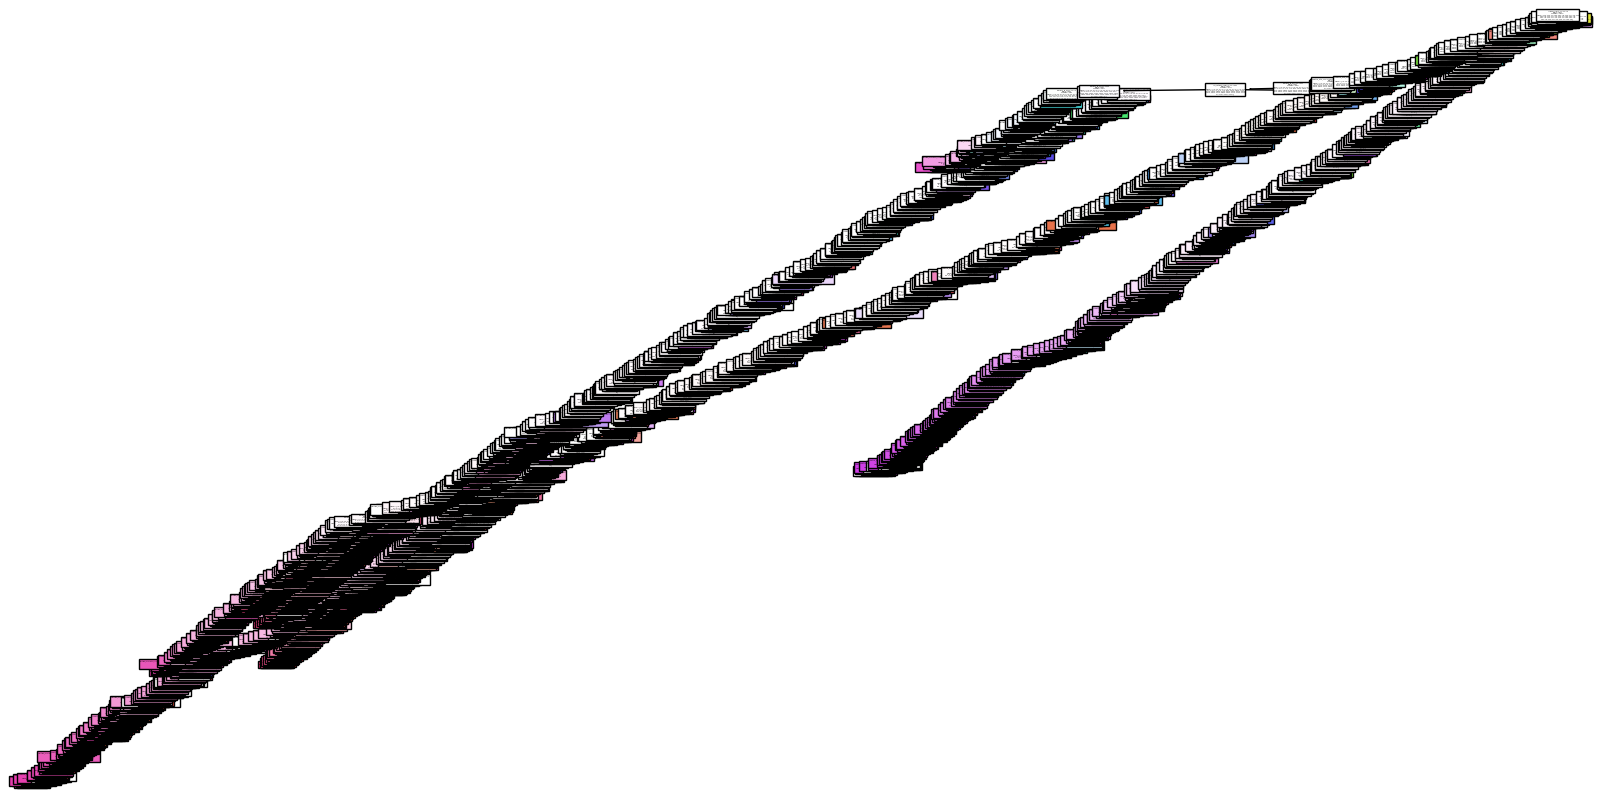

In [112]:

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=encoder.get_feature_names_out(input_features=X.columns))
plt.show()


In [ ]:
df_business = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df_business

In [ ]:
#Business 
('business_id''name''address''city''state''postal_code''latitude'	'longitude'	'phone_number')

In [ ]:
df_business = df_business.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [ ]:
df_business.head()

In [ ]:
# Check the data types 
df_business.dtypes

In [ ]:
df_business.isna().sum()

In [ ]:
for col in df_business.columns:
    pct_missing = np.mean(df_business[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
# Specify the columns to drop
columns_to_drop = [
    "business_location", 
    "inspection_id", 
    "inspection_date", 
    "inspection_type", 
    "violation_id",  
    "neighborhoods", 
    "sf_find_neighborhoods", 
    "current_police_districts", 
    "analysis_neighborhoods"
]

# Drop the specified columns
df_business.drop(columns_to_drop, axis=1, inplace=True)
df_business

In [ ]:
df_business.columns

In [ ]:
df_business.dropna(subset=['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_phone_number', 'inspection_score',
       'violation_description','risk_category', 'current_supervisor_districts'], inplace=True) 

In [ ]:
df_business

In [ ]:
def advisor(violation_description):
    if violation_description in ['Unclean or degraded floors walls or ceilings',
                                 'Inadequately cleaned or sanitized food contact surfaces',
                                 'Wiping cloths not clean or properly stored or inadequate sanitizer',
                                 'Unclean nonfood contact surfaces',
                                 'Unclean or unsanitary food contact surfaces',
                                 'Unclean hands or improper use of gloves',
                                 'Unclean unmaintained or improperly constructed toilet facilities',
                                 'Unsanitary employee garments hair or nails']:
        return "unclean"
    elif violation_description in ['Unapproved or unmaintained equipment or utensils',
                                   'Inadequate and inaccessible handwashing facilities',
                                   'Inadequate warewashing facilities or equipment',
                                   'No thermometers or uncalibrated thermometers']:
        return "lack of equipment"
    elif violation_description in ['Moderate risk food holding temperature',
                                   'High risk food holding temperature',
                                   'Insufficient hot water or running water',
                                   'Improper cooling methods',
                                   'No hot water or running water']:
        return "Under Temperature"
    elif violation_description in ['Moderate risk vermin infestation',
                                   'Foods not protected from contamination',
                                   'Low risk vermin infestation',
                                   'Contaminated or adulterated food',
                                   'High risk vermin infestation',
                                   'Sewage or wastewater contamination']:
        return "Contaminated"
    elif violation_description in ['Improper food storage',
                                   'Improper storage of equipment utensils or linens',
                                   'Improper thawing methods',
                                   'Improper storage use or identification of toxic substances',
                                   'Inadequate dressing rooms or improper storage of personal items',
                                   'Reservice of previously served foods',
                                   'No person in charge of food facility',
                                   'Unapproved living quarters in food facility',
                                   'Unapproved food source',
                                   'Other moderate risk violation',
                                   'Other high risk violation']:
        return "Unmanage"
    elif violation_description in ['Food safety certificate or food handler card not available',
                                   'Inadequate food safety knowledge or lack of certified food safety manager',
                                   'Permit license or inspection report not posted',
                                   'Other low risk violation',
                                   'Noncompliance with HAACP plan or variance',
                                   'Improper food labeling or menu misrepresentation',
                                   'Inadequate procedures or records for time as a public health control',
                                   'Inadequate or unsanitary refuse containers or area or no garbage service',
                                   'No plan review or Building Permit',
                                   'Unauthorized or unsafe use of time as a public health control measure',
                                   'Worker safety hazards',
                                   'Non service animal',
                                   'Unpermitted food facility',
                                   'Inadequate HACCP plan record keeping']:
        return "Lack Certificate"
    elif violation_description in ['Improper or defective plumbing', 'Inadequate ventilation or lighting']:
        return "UnderMaintenance"
    elif violation_description in ['Employee eating or smoking',
                                   'Food in poor condition',
                                   'Improper reheating of food',
                                   'Noncompliance with shell fish tags or display',
                                   'Inadequate sewage or wastewater disposal']:
        return "untrained worker"
    elif violation_description in ['Low Risk', 'Moderate Risk']:
        return "expire-food reserve"
    else:
        return "not convinced"

# Applying the advisor function to create the violation category column
df_business["violation_Category"] = df_business["violation_description"].apply(lambda x: advisor(x))
df_business

In [ ]:
df_business["responce_result"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "NO"
    else:
        return "Yes"

df_business["responce_result"] = df_business["inspection_score"].apply(lambda x : advisor (x))
df_business

In [ ]:
df_business["ratings"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "0"
    elif risk_category in ['Moderate Risk']:
        return "3.5 "
    else:
        return "5 "

df_business["ratings"] = df_business["risk_category"].apply(lambda x : advisor (x))
df_business

In [ ]:
df_business.to_csv('Business.csv')